In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
books_data = pd.read_csv("books.csv")
books_tags_data= pd.read_csv("book_tags.csv")
ratings_data = pd.read_csv("ratings.csv")

In [14]:
print(books_data.shape)
print(books_tags_data.shape)
print(ratings_data.shape)

(399, 24)
(40200, 3)
(233383, 3)


# Q1)How many books do not have an original title [books.csv]?

In [15]:
books_with_no_title = books_data['original_title'].isnull().sum()
print("Number of books with no original title",books_with_no_title)

Number of books with no original title 36


# Q2)How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [16]:
books_data = books_data.dropna(subset=['original_title'])
books_tags_data = books_tags_data[books_tags_data['goodreads_book_id'].isin(books_data['goodreads_book_id'])]
ratings_data = ratings_data[ratings_data['book_id'].isin(books_data['book_id'])]

In [17]:
unique_books_count = books_data['book_id'].nunique()
print("Number of unique books =",unique_books_count)

Number of unique books = 363


# Q3)How many unique users are present in the dataset [ratings.csv] ?

In [18]:
unique_users_count = ratings_data['user_id'].nunique()
print("Number of unique users=",unique_users_count)

Number of unique users= 40573


# Q4)How many unique tags are there in the dataset [book_tags.csv] ?

In [19]:
unique_tags_no = books_tags_data['tag_id'].nunique()
print("Number of unique tags =",unique_tags_no)

Number of unique tags = 3438


# Q5)Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

In [20]:
freq_tag_id = books_tags_data['tag_id'].value_counts().idxmax()
print("The most frequently used tag_id =",freq_tag_id)

The most frequently used tag_id = 4600


# Q6)Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

In [21]:
max_tagged_book_id = books_tags_data['count'].idxmax()
max_tagged_book_title = books_data.loc[books_data['goodreads_book_id'] == books_tags_data.loc[max_tagged_book_id, 'goodreads_book_id'], 'title'].values[0]
print("The book with the most tags =", max_tagged_book_title)

The book with the most tags = Bossypants


# Q7)Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

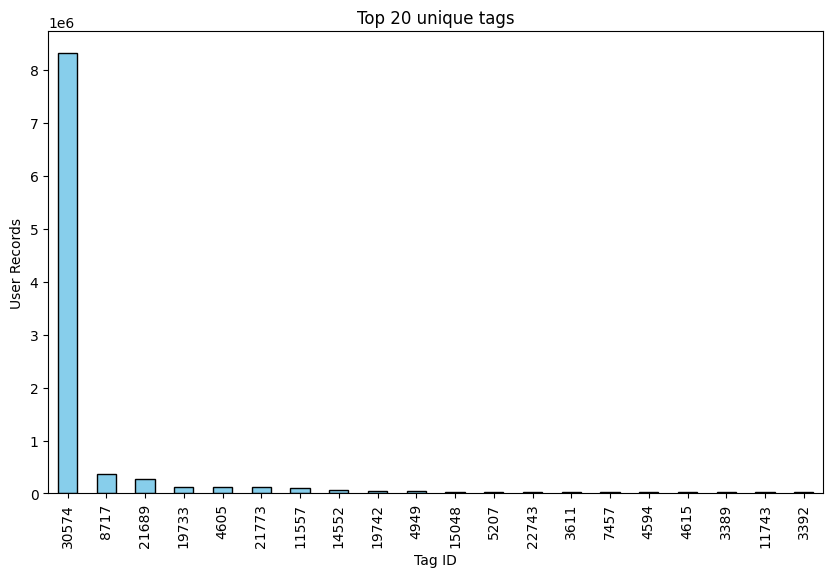

In [11]:
tags_top = books_tags_data.groupby('tag_id')['count'].sum().sort_values(ascending=False).head(20)
tags_top.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Top 20 unique tags')
plt.xlabel('Tag ID')
plt.ylabel('User Records')
plt.show()